## UK used car price prediction 
### author: Bakhtygerey Nakubov
### data: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes
#### this is regression problem, and i will use some classic ML algoritms

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

### Getting data from files and transform to pd dataframe

In [3]:
cars = ['audi', 'bmw', 'ford', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw']
df = pd.DataFrame()
for marks in cars: 
    df1 = pd.read_csv('cars_data/' + marks + '.csv')
    df1['mark'] = marks
    df = pd.concat([df1, df], ignore_index = True)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mark
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,vw
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,vw
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0,vw
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,vw
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,vw
...,...,...,...,...,...,...,...,...,...,...
94322,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0,audi
94323,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0,audi
94324,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0,audi
94325,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4,audi


Below we can see that electric and hybrid cars very different(mpg is too high, taxes is too low) from cars with petrol and diesel engine,
i will use only gas cars(petrol, diesel), because i can say electric cars it is outliers, and their count as not much as gas cars

In [5]:
df.groupby('fuelType').mean()

,year,price,mileage,tax,mpg,engineSize
fuelType,,,,,,
Diesel,2016.904247,19533.723754,28759.766658,114.510936,58.324822,2.002871
Electric,2015.833333,16645.333333,21360.666667,22.500000,297.066667,1.066667
Hybrid,2016.989373,19298.066691,24903.728106,65.192378,91.179406,1.789630
Other,2017.402439,17462.219512,21107.743902,103.658537,85.635772,1.508130
Petrol,2017.228347,14988.282032,18809.928786,127.576404,50.844182,1.419984


taking gas cars and creating new feature 'age', i think it better thay 'year' feature, it will better converge in gradient descend

In [6]:
#df = df[df['fuelType'] == 'Diesel' | df['fuelType'] == 'Petrol']
df_gas = df[(df['fuelType'] == 'Petrol') | (df['fuelType'] == 'Diesel')]
df_gas = df_gas[df_gas['year'] < 2023]
df_gas['age'] = 2022 - df_gas['year']
df_gas = df_gas.drop('year', axis = 1)
df_gas

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,mark,age
0,T-Roc,25000,Automatic,13904,Diesel,145,49.6,2.0,vw,3
1,T-Roc,26883,Automatic,4562,Diesel,145,49.6,2.0,vw,3
2,T-Roc,20000,Manual,7414,Diesel,145,50.4,2.0,vw,3
3,T-Roc,33492,Automatic,4825,Petrol,145,32.5,2.0,vw,3
4,T-Roc,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,vw,3
...,...,...,...,...,...,...,...,...,...,...
94322,A3,16999,Manual,4018,Petrol,145,49.6,1.0,audi,2
94323,A3,16999,Manual,1978,Petrol,150,49.6,1.0,audi,2
94324,A3,17199,Manual,609,Petrol,150,49.6,1.0,audi,2
94325,Q3,19499,Automatic,8646,Petrol,150,47.9,1.4,audi,5


In [7]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.491989,-0.739623,0.192472,-0.131081,-0.038699
price,0.491989,1.000000,-0.421421,0.309715,-0.299290,0.637989
mileage,-0.739623,-0.421421,1.000000,-0.221361,0.185540,0.105938
tax,0.192472,0.309715,-0.221361,1.000000,-0.451656,0.281768
mpg,-0.131081,-0.299290,0.185540,-0.451656,1.000000,-0.251841
engineSize,-0.038699,0.637989,0.105938,0.281768,-0.251841,1.000000


## finding outliers with zscore methode

In [8]:
from scipy.stats import zscore
df1 = df_gas
df1 = df1[[ 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'age']].apply(zscore)


,price,mileage,tax,mpg,engineSize,age
0,0.803219,-0.430706,0.368686,-0.407337,0.580540,-0.893456
1,0.990985,-0.868608,0.368686,-0.407337,0.580540,-0.893456
2,0.304635,-0.734922,0.368686,-0.334343,0.580540,-0.893456
3,1.650012,-0.856280,0.368686,-1.967575,0.580540,-0.893456
4,0.593814,-0.777765,0.448667,-1.301508,-0.301449,-0.893456
...,...,...,...,...,...,...
94322,0.005386,-0.894107,0.368686,-0.407337,-1.183438,-1.360834
94323,0.005386,-0.989731,0.448667,-0.407337,-1.183438,-1.360834
94324,0.025329,-1.053903,0.448667,-0.407337,-1.183438,-1.360834
94325,0.254677,-0.677172,0.448667,-0.562448,-0.477847,0.041301


#### a lot of outliers :(

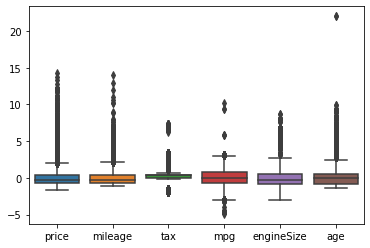

In [159]:

#normalized_df=(df-df.mean())/df.std()
ax = sns.boxplot(data = df1)

#### taking only rows with values in interval (-2std, 2std), now i don't have outliers, but i had to lose 19% of data

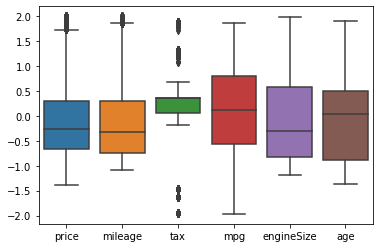

In [160]:
df2 = df1[df1.gt(-2)]
df2 = df2[df2.lt(2)]
df2 = df2.dropna()
ax = sns.boxplot(data = df2)

In [19]:
num_cols = ['age', 'mileage', 'tax', 'mpg', 'engineSize']
cat_cols = ['model', 'transmission', 'fuelType', 'mark']
df_gas = df_gas[df_gas.index.isin(df2.index)]


# models testing

## first i will try simple linear regression

#### preprocesing data and dividing to train and test. we must to shuffle data, because data sorted by mark

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df_gas.drop('price', axis = 1)
Y = df_gas.price.to_numpy()

preprocess = ColumnTransformer([('scaler', StandardScaler(), num_cols),
                                 ('encoder', OneHotEncoder(), cat_cols)])
X1 = preprocess.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=0.20, random_state=42, shuffle = True)




#### we have good r2 score, but linear regression to simple. we should try polynomial regression

In [165]:
linear = LinearRegression()
linear.fit(x_train, y_train)
linear.score(x_test, y_test)

0.895536426430074

In [47]:


preprocess = ColumnTransformer([('scaler', StandardScaler(), num_cols),('polynom', PolynomialFeatures(7), num_cols), ('encoder', OneHotEncoder(), cat_cols)])

X_scaled = preprocess.fit_transform(X)

### cheking different polynomial equations 

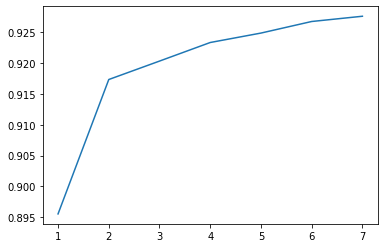

In [175]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
xs = np.arange(1,8)
scores = []
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42, shuffle = True)
for i in xs:
    numerical_transformer = Pipeline([('scaler', StandardScaler()),
                                      ('polynom', PolynomialFeatures(i))
    ])
    ct = ColumnTransformer([('num_transformer', numerical_transformer, num_cols),
                            ('encoder', OneHotEncoder(handle_unknown='ignore'), cat_cols)])

    pipeline = Pipeline([
                       ('column_transformer', ct),
                       ('linear_regression', LinearRegression() )
    ])
    pipeline.fit(x_train,y_train)
    scores.append(pipeline.score(x_test, y_test))
plt.plot(xs, scores)

## we can see that 7-th degree polynomyal regression have highest r2 score (0.93)

In [177]:
numerical_transformer = Pipeline([('scaler', StandardScaler()),
                                      ('polynom', PolynomialFeatures(7))
    ])
ct = ColumnTransformer([('num_transformer', numerical_transformer, num_cols),
                            ('encoder', OneHotEncoder(handle_unknown='ignore'), cat_cols)])

pipeline = Pipeline([
                       ('column_transformer', ct),
                       ('linear_regression', LinearRegression() )
    ])
pipeline.fit(x_train,y_train)
pipeline.score(x_test, y_test)

0.9275959778633777

### lets try decision tree 

In [178]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=15)
tree_transform = ColumnTransformer([
                        ('encoder', OneHotEncoder(handle_unknown='ignore'), cat_cols)])
tree_pipeline = Pipeline([
                   ('column_transformer', tree_transform),
                   ('tree_regression', regr_1)
])
tree_pipeline.fit(x_train, y_train)
tree_pipeline.score(x_test, y_test)

0.6301326985201058

#### we see very bad r2 score. i don't know why, but scikit learn OneHotEncoder work very bad with DecisionTreeRegressor. 
#### I will use pd.get_dummies method, it is much better here.

0.9329884964081886


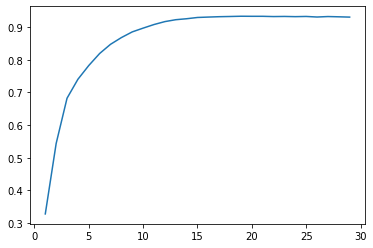

In [182]:
xs = np.arange(1,30)
scores = []
X_tree = pd.get_dummies(X, columns=['model','transmission', 'fuelType','mark'])
X_tree = X_tree.to_numpy()
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_tree, Y, test_size=0.20, random_state=22, shuffle = True)
for i in xs:
    regr_1 = DecisionTreeRegressor(max_depth=i)
    regr_1.fit(x_train1, y_train1)
    scores.append(regr_1.score(x_test1, y_test1))
plt.plot(xs, scores)
print(max(scores))

### I have very good score, but lets try different parameters with GridSearchCV

In [145]:
X_tree = pd.get_dummies(X, columns=['model','transmission', 'fuelType','mark'])
X_tree = X_tree.to_numpy()
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_tree, Y, test_size=0.20, random_state=22, shuffle = True)

In [179]:
from sklearn.model_selection import GridSearchCV

parameters = { "min_samples_split": [2,5,7,10],
                "min_samples_leaf": [1,2,5],
             'max_depth':[5,7,10,15,20]}
gs_cv = GridSearchCV(DecisionTreeRegressor() , parameters)
gs_cv.fit(x_train1, y_train1)
print(gs_cv.score(x_test1,y_test1))
print(gs_cv.best_params_)

0.94180814603875
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}


## i have nice score with this parameters. I think it's enough. decision tree showed himself better than linear regression but maybe should to try drig search for linear regresion.

array([[4.6262e+04, 1.4500e+02, 6.0100e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.6541e+04, 1.4500e+02, 3.6200e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.7554e+04, 1.4500e+02, 6.1400e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [7.2040e+03, 2.0000e+02, 4.2200e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0052e+04, 1.4500e+02, 5.0400e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [4.0930e+03, 1.4500e+02, 3.6700e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])